In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path("/content/drive/MyDrive/UTKFace/")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [ ]:
print(len(filenames))

13170


In [ ]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])


In [ ]:
df = pd.DataFrame()
df['image'], df['age'] = image_path, age_labels

In [ ]:
df.head()

,image,age
0,12_0_0_20170110215606404.jpg.chip.jpg,12
1,26_1_3_20170104223128119.jpg.chip.jpg,26
2,30_1_2_20170116164737724.jpg.chip.jpg,30
3,21_0_1_20170114030009371.jpg.chip.jpg,21
4,1_0_2_20161219162212662.jpg.chip.jpg,1


In [ ]:
df = df.astype({'age':'float32'})

In [ ]:
print(df.dtypes)

image     object
age      float32
dtype: object


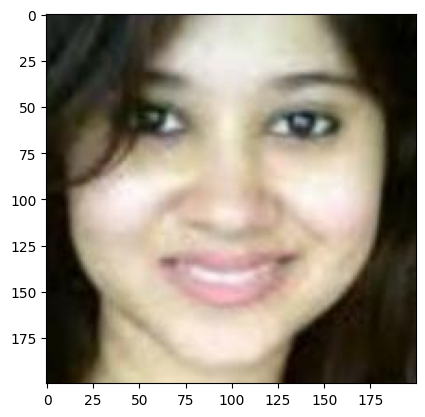

In [ ]:
img = Image.open("/content/drive/MyDrive/UTKFace/"+df.image[1])
plt.imshow(img)

<ipython-input-10-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

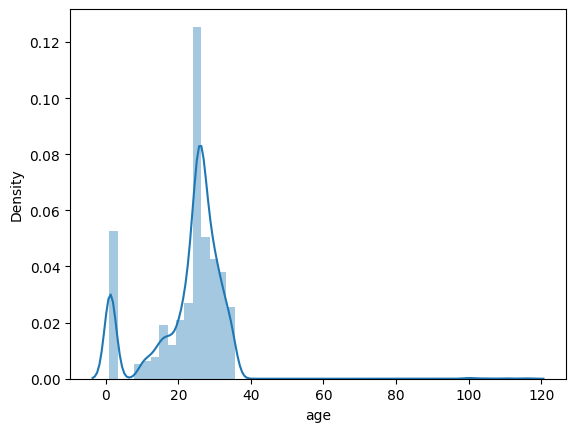

In [ ]:
sns.distplot(df.age)

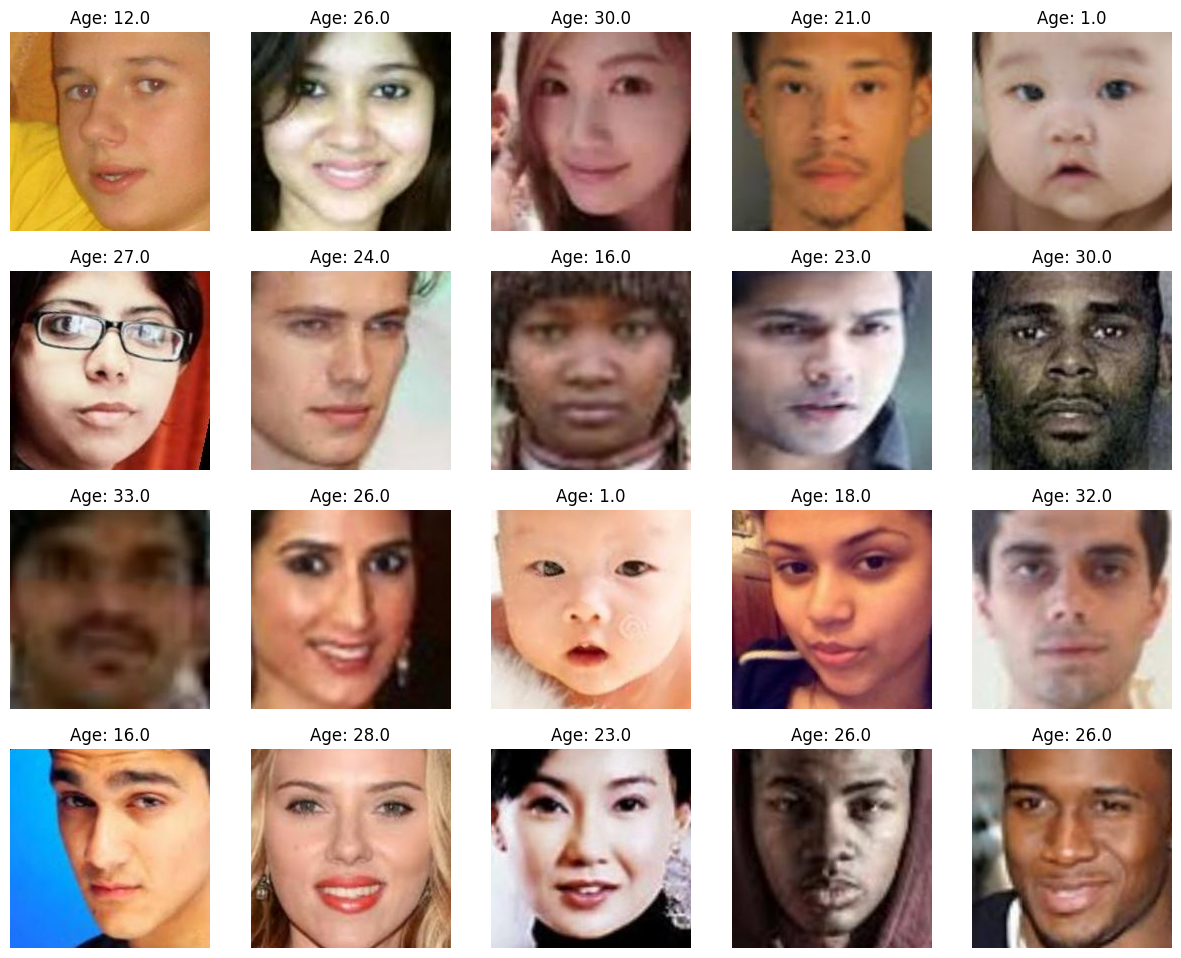

In [ ]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("/content/drive/MyDrive/UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age}")
    plt.axis('off')

In [ ]:
train, test = train_test_split(df, test_size=0.5, random_state=42)

In [ ]:
train.head()


,image,age
11950,25_1_1_20161220222224947.jpg.chip.jpg,25.0
3768,29_0_0_20170105164610203.jpg.chip.jpg,29.0
5077,15_1_0_20170109204210842.jpg.chip.jpg,15.0
11565,24_1_0_20170117150535820.jpg.chip.jpg,24.0
4038,27_0_0_20170117202105807.jpg.chip.jpg,27.0


In [ ]:
x_train = []
for file in train.image:
    img = load_img("/content/drive/MyDrive/UTKFace/"+file, color_mode='grayscale')
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

<ipython-input-15-d861cbbd5f37>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [ ]:
x_train.shape

In [ ]:
x_train = x_train/255

In [ ]:

y_age = np.array(train.age)

In [ ]:
input_size = (128,128,1)

### **Convolutional Neural Network Model:**

The model below was trained using **CNN**.

In [ ]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)

output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_2])

In [ ]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['MeanSquaredError'])

In [ ]:
model.summary()

In [ ]:
model_history = model.fit(x=x_train, y=y_age, batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
593/593 [==============================] - 19s 18ms/step - loss: 7.4216 - gender_output_loss: 0.5867 - age_output_loss: 6.8350 - gender_output_mean_squared_error: 0.1910 - age_output_mean_squared_error: 82.6194 - val_loss: 9.4361 - val_gender_output_loss: 0.4937 - val_age_output_loss: 8.9424 - val_gender_output_mean_squared_error: 0.1594 - val_age_output_mean_squared_error: 122.9469
Epoch 2/20
593/593 [==============================] - 10s 17ms/step - loss: 5.8972 - gender_output_loss: 0.4082 - age_output_loss: 5.4890 - gender_output_mean_squared_error: 0.1299 - age_output_mean_squared_error: 57.3801 - val_loss: 5.1490 - val_gender_output_loss: 0.3306 - val_age_output_loss: 4.8183 - val_gender_output_mean_squared_error: 0.1036 - val_age_output_mean_squared_error: 56.5957
Epoch 3/20
593/593 [==============================] - 9s 15ms/step - loss: 5.4411 - gender_output_loss: 0.3476 - age_output_loss: 5.0935 - gender_output_mean_squared_error: 0.1094 - age_output_mean_squared_e

In [ ]:
model.save('Scratchcnn_gender_age_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


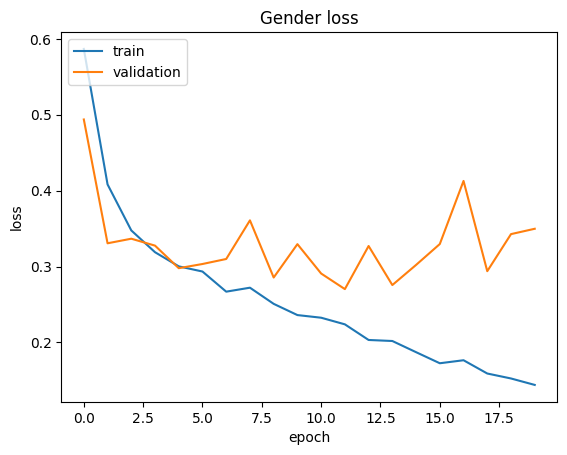

In [ ]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

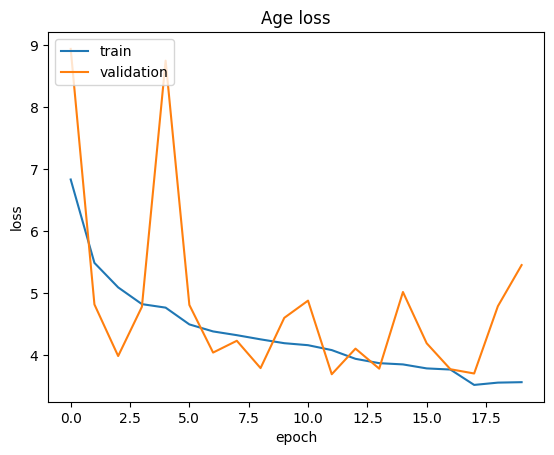

In [ ]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Original: Gender =  Male  Age =  32.0
1/1 [==============================] - 0s 420ms/step
Prediction: Gender =  Male  Age =  24


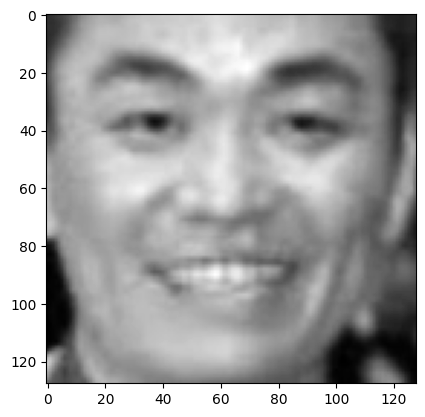

In [ ]:
index=50
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Male  Age =  29.0
1/1 [==============================] - 0s 19ms/step
Prediction: Gender =  Male  Age =  20


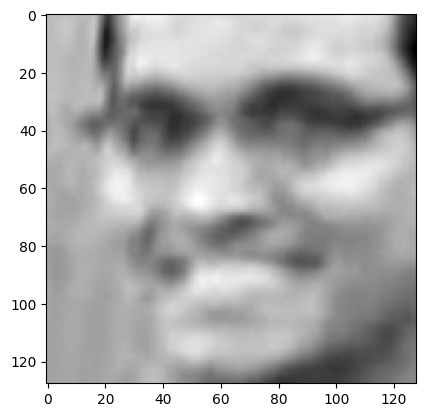

In [ ]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

### **VGG16:**

The model below was trained using **VGG16**.

In [ ]:
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
x_train = []
for file in train.image:
    img = load_img("/content/drive/MyDrive/UTKFace/"+file, color_mode='grayscale')
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)
x_train = x_train.reshape(len(x_train), 128, 128, 1)
x_train = x_train / 255.0
y_gender = np.array(train.gender)
y_age = np.array(train.age)


<ipython-input-14-c334e527fd00>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


KeyboardInterrupt: 

In [ ]:
x_test = []
for file in test.image:
    img = load_img("/content/drive/MyDrive/UTKFace/"+file, color_mode='grayscale')
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_test.append(img)

x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test), 128, 128, 1)
x_test = x_test / 255.0
y_gender_test = np.array(test.gender)
y_age_test = np.array(test.age)

<ipython-input-21-0b60150cd442>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [ ]:
def build_vgg16_model(input_shape):
    base_model = VGG16(include_top=False, weights=None, input_shape=input_shape)

    x = base_model.output
    x = Flatten()(x)

    # Gender prediction branch
    gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)

    # Age prediction branch
    age_output = Dense(1, activation='linear', name='age_output')(x)

    model = Model(inputs=base_model.input, outputs=[gender_output, age_output])

    return model

input_shape = (128, 128, 1)
model = build_vgg16_model(input_shape)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={'gender_output': 'binary_crossentropy', 'age_output': 'mean_squared_error'},
    metrics={'gender_output': 'accuracy', 'age_output': 'mae'}
)

In [ ]:
history = model.fit(
    x_train, {'gender_output': y_gender, 'age_output': y_age},
    validation_data=(x_test, {'gender_output': y_gender_test, 'age_output': y_age_test}),
    epochs=25,
    batch_size=32
)

Epoch 1/25


UnimplementedError: Graph execution error:

Detected at node mean_squared_error/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-24-059e8bf240d5>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 1705, in mean_squared_error

2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node mean_squared_error/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_7812]

In [ ]:
model.save('vgg16_gender_age_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
results = model.evaluate(x_test, {'gender_output': y_gender_test, 'age_output': y_age_test})
print("Test Loss, Test Gender Loss, Test Age Loss, Test Gender Accuracy, Test Age MAE:", results)

206/206 [==============================] - 8s 41ms/step - loss: 40.4754 - gender_output_loss: 0.4233 - age_output_loss: 40.0521 - gender_output_accuracy: 0.8030 - age_output_mae: 3.9338
Test Loss, Test Gender Loss, Test Age Loss, Test Gender Accuracy, Test Age MAE: [40.475425720214844, 0.4233233332633972, 40.0521125793457, 0.8030372262001038, 3.9338152408599854]


Original: Gender =  Female  Age =  115.0
1/1 [==============================] - 0s 42ms/step
Prediction: Gender =  Male  Age =  116


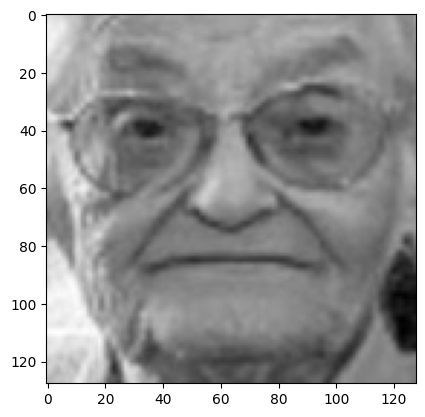

In [ ]:
index=6100
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Male  Age =  29.0
1/1 [==============================] - 0s 33ms/step
Prediction: Gender =  Male  Age =  30


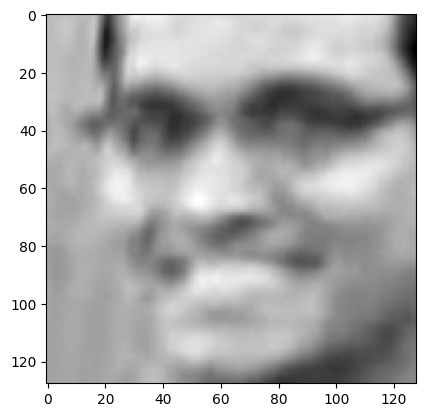

In [ ]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')